## CART Regression Model: PCOS

### CART stands for Classification and Regression Trees. It refers to Decision Tree models that can be used for classification or regression. In this model we will use it for Regression

## Imports

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor

# Performance
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

## Dataset

In [3]:
# Import data 
df = pd.read_csv('/Users/taniarizwan/Documents/University/Third Year 2022/Bmen 415/Project/PCOS_data_without_infertility.csv')

# Drop ID columns. Remove L&R follicle numbers since we are predicting Ave. This will bias data. Remove NaN column
dataset= df.drop(['Sl. No', 'Patient File No.', 'Follicle No. (L)', 'Follicle No. (R)', 'Unnamed: 45'], axis=1) 
x=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]
y = dataset['Follicle No. (Ave)'] 

# Remove null value in X 
x[x.isnull().any(axis=1)] 
X = x.dropna(axis='columns')

## Data Exploration

<Axes: >

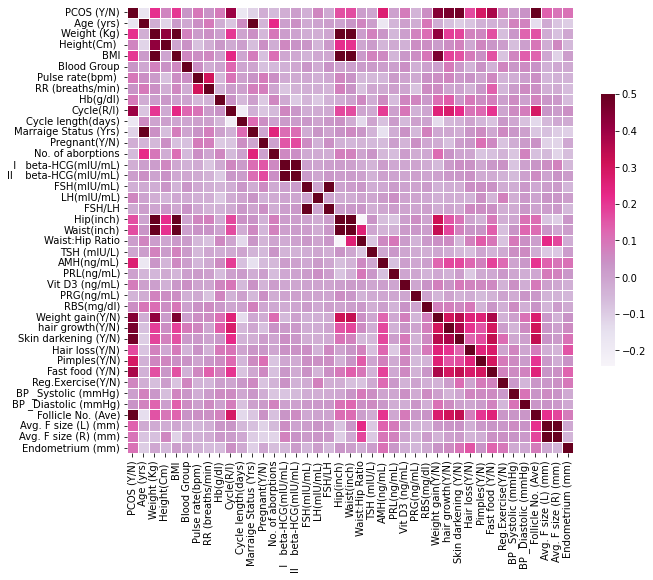

In [4]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("PuRd", as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,vmax=0.5, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

## Train Test Split

In [5]:
# Use X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=142)

In [6]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((378, 38), (378,))  
Test: ((162, 38), (162,))


## CART Regression

In [16]:
# Fit the model
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [17]:
# Predictions
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [18]:
# Performance
performance = pd.DataFrame({'True Value':y_test, 'Prediction':test_preds, 'Error':abs(y_test-test_preds)})
performance

,True Value,Prediction,Error
507,1.0,6.000000,5.000000
208,6.0,4.625000,1.375000
418,3.0,7.153846,4.153846
404,2.5,6.380000,3.880000
416,3.0,2.870968,0.129032
...,...,...,...
444,7.5,7.000000,0.500000
163,2.5,3.250000,0.750000
437,10.0,4.500000,5.500000
130,6.0,6.500000,0.500000


In [23]:
# Performance: training (RMSE)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print(rmse_train)

0.8597406361374963


In [22]:
# Performance: training (R2)
training_r2 = r2_score(y_train, train_preds)
print(training_r2)

0.9556771403159819


In [21]:
# Performance: testing (RMSE)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)
print(rmse_test)

4.0950608026727675


In [20]:
# Performance: testing (R2)
testing_r2 = r2_score(y_test, test_preds)
print(testing_r2)

0.029817319419958466


In [19]:
# Model accuracy - how often is the regressor correct?
reg.score(X_test, y_test) # Computes predictions inside

0.029817319419958466

## Visualization

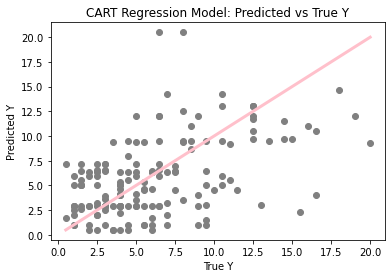

In [25]:
plt.scatter(y_test, test_preds, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='pink', lw=3)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('CART Regression Model: Predicted vs True Y')
plt.show()

<Axes: xlabel='y_test', ylabel='test_preds'>

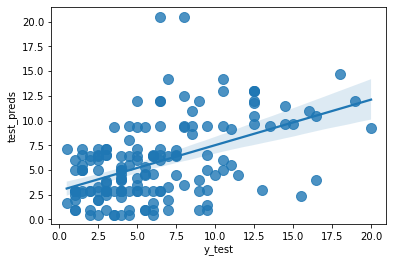

In [26]:
# Another Visualization
reg_df = pd.DataFrame({'y_test': y_test, 'test_preds': test_preds})

# plot the data using sns.regplot()
sns.regplot(data=reg_df, x='y_test', y='test_preds', fit_reg=True, scatter_kws={"s":100})